<a href="https://colab.research.google.com/github/rodincode/backupsite/blob/master/Python_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Print*

In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
#print(data)
features=data['data']
outcomes=data['target_names']
import pandas as pd
df=pd.read_csv('https://cocl.us/customer_dataset')
print(df.head())

X=df[['Age','Defaulted']]
y=df['DebtIncomeRatio']

from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X) 
print(X[0:5])

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4) 
print ('Train set:', X_train.shape,  y_train.shape) 
print ('Test set:', X_test.shape,  y_test.shape)




   Customer Id  Age  Edu  ...  Defaulted  Address  DebtIncomeRatio
0            1   41    2  ...        0.0   NBA001              6.3
1            2   47    1  ...        0.0   NBA021             12.8
2            3   33    2  ...        1.0   NBA013             20.9
3            4   29    2  ...        0.0   NBA009              6.3
4            5   47    1  ...        0.0   NBA008              7.2

[5 rows x 10 columns]
[[ 0.74291541 -0.59494973]
 [ 1.48949049 -0.59494973]
 [-0.25251804  1.68081427]
 [-0.75023477 -0.59494973]
 [ 1.48949049 -0.59494973]]
Train set: (680, 2) (680,)
Test set: (170, 2) (170,)


In [ ]:

p=pd.DataFrame(X_train)
p.head()

,0,1
0,-0.252518,NaN
1,0.742915,-0.59495
2,0.245199,-0.59495
3,-0.128089,-0.59495
4,1.613920,NaN


In [ ]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer()
features=data['data']
outcomes=data['target_names']
#print(features)
features_names=data['feature_names']
#print(features_names)
df=pd.DataFrame(features)
df.columns=['mean radius','mean texture','mean perimeter','mean area','mean smoothness',
            'mean compactness','mean concavity','mean concave points','mean symmetry',
            'mean fractal dimension','radius error' 'texture error','perimeter error','area error',
            'smoothness error','compactness error','concavity error','concave points error',
            'symmetry error','fractal dimension error', 'worst radius','worst texture',
            'worst perimeter','worst area', 'worst smoothness','worst compactness','worst concavity',
            'worst concave points','worst symmetry','worst fractal dimension','extra']
df.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius errortexture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,extra
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
len(features_names)

30

Text(2020-01-23 00:00:00, -55, 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv')

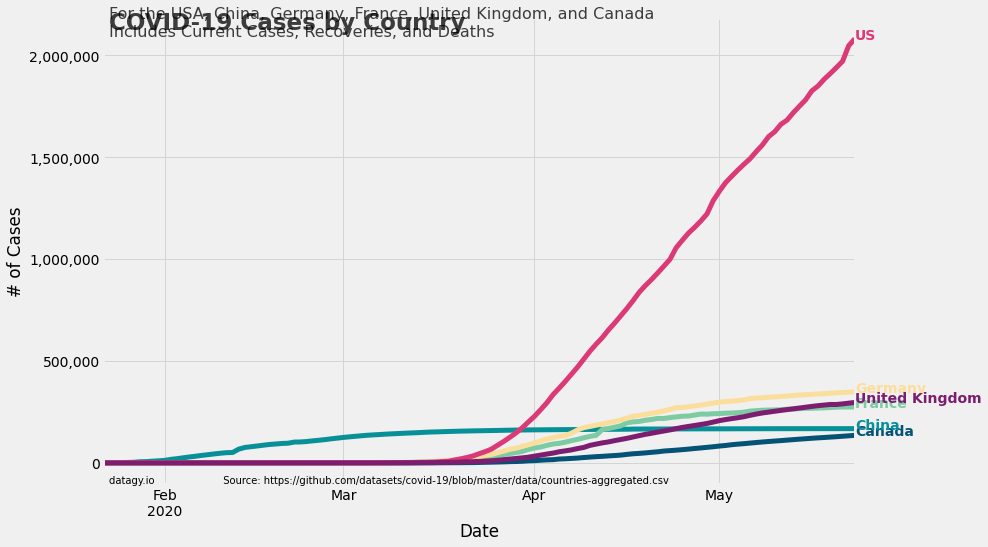

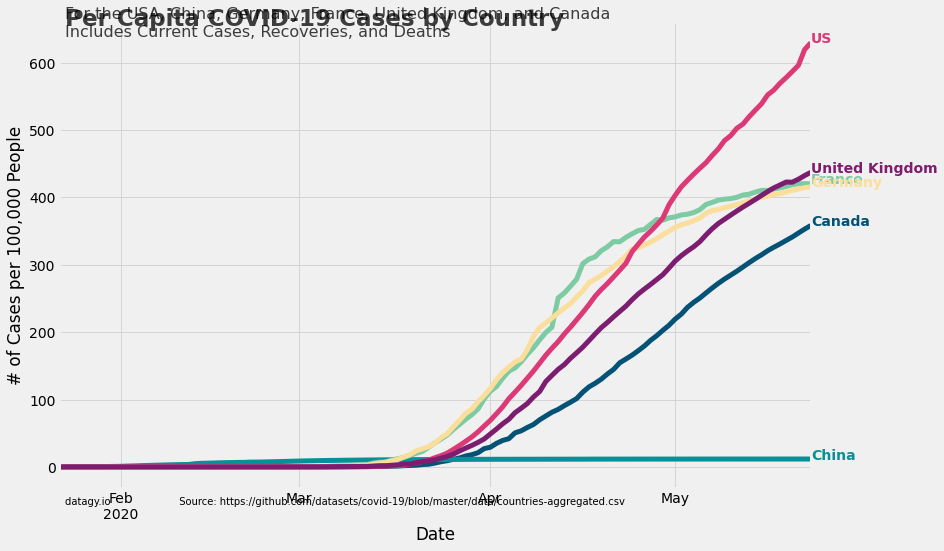

In [ ]:
# Section 1 - Loading our Libraries
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker
#%matplotlib inline #if you're working in a Jupyter notebook

# Section 2 - Loading and Selecting Data
df = pd.read_csv('https://raw.githubusercontent.com/datasets/covid-19/master/data/countries-aggregated.csv', parse_dates=['Date'])
countries = ['Canada', 'Germany', 'United Kingdom', 'US', 'France', 'China']
df = df[df['Country'].isin(countries)]

# Section 3 - Creating a Summary Column
df['Cases'] = df[['Confirmed', 'Recovered', 'Deaths']].sum(axis=1)

# Section 4 - Restructuring our Data
df = df.pivot(index='Date', columns='Country', values='Cases')
countries = list(df.columns)
covid = df.reset_index('Date')
covid.set_index(['Date'], inplace=True)
covid.columns = countries

# Section 5 - Calculating Rates per 100,000
populations = {'Canada':37664517, 'Germany': 83721496 , 'United Kingdom': 67802690 , 'US': 330548815, 'France': 65239883, 'China':1438027228}
percapita = covid.copy()
for country in list(percapita.columns):
    percapita[country] = percapita[country]/populations[country]*100000

# Section 6 - Generating Colours and Style
colors = {'Canada':'#045275', 'China':'#089099', 'France':'#7CCBA2', 'Germany':'#FCDE9C', 'US':'#DC3977', 'United Kingdom':'#7C1D6F'}
plt.style.use('fivethirtyeight')

# Section 7 - Creating the Visualization
plot = covid.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
plot.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
plot.grid(color='#d4d4d4')
plot.set_xlabel('Date')
plot.set_ylabel('# of Cases')

# Section 8 - Assigning Colour
for country in list(colors.keys()):
    plot.text(x = covid.index[-1], y = covid[country].max(), color = colors[country], s = country, weight = 'bold')

# Section 9 - Adding Labels
plot.text(x = covid.index[1], y = int(covid.max().max())+45000, s = "COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
plot.text(x = covid.index[1], y = int(covid.max().max())+15000, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
plot.text(x = percapita.index[1], y = -100000,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)

percapitaplot = percapita.plot(figsize=(12,8), color=list(colors.values()), linewidth=5, legend=False)
percapitaplot.grid(color='#d4d4d4')
percapitaplot.set_xlabel('Date')
percapitaplot.set_ylabel('# of Cases per 100,000 People')
for country in list(colors.keys()):
    percapitaplot.text(x = percapita.index[-1], y = percapita[country].max(), color = colors[country], s = country, weight = 'bold')
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+25, s = "Per Capita COVID-19 Cases by Country", fontsize = 23, weight = 'bold', alpha = .75)
percapitaplot.text(x = percapita.index[1], y = percapita.max().max()+10, s = "For the USA, China, Germany, France, United Kingdom, and Canada\nIncludes Current Cases, Recoveries, and Deaths", fontsize = 16, alpha = .75)
percapitaplot.text(x = percapita.index[1], y = -55,s = 'datagy.io                      Source: https://github.com/datasets/covid-19/blob/master/data/countries-aggregated.csv', fontsize = 10)


In [ ]:
print("Hello Word")

Hello Word


In [ ]:
a=0
b=1
count=0
while count<=10:
  print(a)
  c=a+b
  a=b
  b=c
  count=count+1

0
1
1
2
3
5
8
13
21
34
55


In [ ]:
from sklearn.linear_model import LinearRegression
# Three features per row
#Step 1, Step2
features = [[0,   1,  1], 
            [2,   3,  5],
            [8,  13, 21],
            [34, 55, 89]]
            
# This changed.
# Now a single label consists of a list of output values to be predicted
# 5 outputs per row
labels = [[2,     3,   5,   8,  13], 
          [8,    13,  21,  34,  55], 
          [34,   55,  89, 144, 233], 
          [144, 233, 377, 610, 987]]

#Step 3
clf = LinearRegression()
clf.fit(features, labels)
#test = [[144, 233, 377]]
a = int(input("a: "))
b = int(input("b: "))
c = int(input("c: "))
#test = [[2,3,5]]
test = [[a,b,c]]
print(clf.predict(test))


a: 10
b: 20
c: 30
[[ 50.  80. 130. 210. 340.]]


In [ ]:
from sklearn.linear_model import LinearRegression
# Three features per row
features = [[0,   1,  1],
            [2,   3,  5],
            [8,  13, 21],
            [34, 55, 89]]

# This changed.
# Now a single label consists of a list of output values to be predicted
# 5 outputs per row
answers = [2,8,34,144]

clf = LinearRegression()
clf.fit(features, answers)
#test = [[144, 233, 377]]
test = [[10,20,30]]
print(clf.predict(test))

[50.]


In [ ]:
def func(a,b,c,d):
  for i in [a,b,c,d]:
    #print(i**2)
    yield i

k=func(2,4,55,7)  
for i in range(3):
  print(next(k))

2
4
55


In [ ]:
#libraries
#math, seaborn, random

"""
#swap variables with using 3rd variable
a=b
b=c
c=a

#swap without using 3rd variable
a,b=b,a

#Functions
def name_of_function(parameters):
  #body
  return #something

#some funtions dont return anything for eg print returns None
#call a function
name_of_function(arguments)

#pass keywords arguments
name_of_function(parameters=arguments)
#name_of_function(a=2,b=3)

#advantage of keyword arguments/parameter--> default values
"""
#can give any number of input arguments
def func(*a,b=4):
  print(a,b)
#mixture of named arguments and 


#difference between return and yield--> random number
#recursion 


In [ ]:
func(1,2,3,4,5,5,6)

(1, 2, 3, 4, 5, 5, 6) 4


In [ ]:
 # explicitly write a generator function
def double(L):
    for x in L:
          yield x*2
  
# eggs will be a generator
eggs = double([1, 2, 3, 4, 5])
print(eggs)
print("Next",next(eggs))

# the above is equivalent to ("generator comprehension"?)
eggs = (x*2 for x in [1, 2, 3, 4, 5])#short form of writing a generator
print(eggs)
for i in eggs:
  print(i)

# need to do this if you need a list
eggs = list(double([1, 2, 3, 4, 5]))
print(eggs)
# the above is equivalent to (list comprehension)
eggs = [x*2 for x in [1, 2, 3, 4, 5]]
print(eggs)

<generator object double at 0x7f4f7da5ca98>
Next 2
<generator object <genexpr> at 0x7f4f7da5c410>
2
4
6
8
10
[2, 4, 6, 8, 10]
[2, 4, 6, 8, 10]


In [ ]:
x={3*i+9*i* for i in [1,3,5,7,9]}

SyntaxError: ignored

In [ ]:
print(x)

{1, 3, 5, 7, 9}


In [ ]:
import numpy as np
import os
import six.moves.urllib as urllib
import sys
import tarfile
import tensorflow as tf
import zipfile

from collections import defaultdict
from io import StringIO
from matplotlib import pyplot as plt
from PIL import Image

import cv2
cap = cv2.VideoCapture(1)

# This is needed since the notebook is stored in the object_detection folder.
sys.path.append("..")


# ## Object detection imports
# Here are the imports from the object detection module.

# In[3]:

from object_detection.utils import label_map_util

from object_detection.utils import visualization_utils as vis_util


# # Model preparation 

# ## Variables
# 
# Any model exported using the `export_inference_graph.py` tool can be loaded here simply by changing `PATH_TO_CKPT` to point to a new .pb file.  
# 
# By default we use an "SSD with Mobilenet" model here. See the [detection model zoo](https://github.com/tensorflow/models/blob/master/object_detection/g3doc/detection_model_zoo.md) for a list of other models that can be run out-of-the-box with varying speeds and accuracies.

# In[4]:

# What model to download.
MODEL_NAME = 'ssd_mobilenet_v1_coco_2018_01_28'
MODEL_FILE = MODEL_NAME + '.tar.gz'
#DOWNLOAD_BASE = 'http://download.tensorflow.org/models/object_detection/'

# Path to frozen detection graph. This is the actual model that is used for the object detection.
PATH_TO_CKPT = MODEL_NAME + '/frozen_inference_graph.pb'

# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = 'object_detection\data\mscoco_label_map.pbtxt'

NUM_CLASSES = 90


# ## Download Model

# In[5]:

#opener = urllib.request.URLopener()
#opener.retrieve(DOWNLOAD_BASE + MODEL_FILE, MODEL_FILE)
tar_file = tarfile.open(MODEL_FILE)
for file in tar_file.getmembers():
  file_name = os.path.basename(file.name)
  if 'frozen_inference_graph.pb' in file_name:
    tar_file.extract(file, os.getcwd())


# ## Load a (frozen) Tensorflow model into memory.

# In[6]:
# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

detection_graph = tf.Graph()
with detection_graph.as_default():
  od_graph_def = tf.compat.v1.GraphDef()
  with tf.gfile.GFile(PATH_TO_CKPT, 'rb') as fid:
    serialized_graph = fid.read()
    od_graph_def.ParseFromString(serialized_graph)
    tf.import_graph_def(od_graph_def, name='')


# ## Loading label map
# Label maps map indices to category names, so that when our convolution network predicts `5`, we know that this corresponds to `airplane`.  Here we use internal utility functions, but anything that returns a dictionary mapping integers to appropriate string labels would be fine

# In[7]:

label_map = label_map_util.load_labelmap(PATH_TO_LABELS)
categories = label_map_util.convert_label_map_to_categories(label_map, max_num_classes=NUM_CLASSES, use_display_name=True)
category_index = label_map_util.create_category_index(categories)


# ## Helper code

# In[8]:

def load_image_into_numpy_array(image):
  (im_width, im_height) = image.size
  return np.array(image.getdata()).reshape(
      (im_height, im_width, 3)).astype(np.uint8)


# # Detection

# In[9]:

# For the sake of simplicity we will use only 2 images:
# image1.jpg
# image2.jpg
# If you want to test the code with your images, just add path to the images to the TEST_IMAGE_PATHS.
PATH_TO_TEST_IMAGES_DIR = 'test_images'
TEST_IMAGE_PATHS = [ os.path.join(PATH_TO_TEST_IMAGES_DIR, 'image{}.jpg'.format(i)) for i in range(1, 3) ]

# Size, in inches, of the output images.
IMAGE_SIZE = (12, 8)


# In[10]:

with detection_graph.as_default():
  with tf.compat.v1.Session(graph=detection_graph) as sess:
    while True:
        ret, image_np = cap.read()
        # Expand dimensions since the model expects images to have shape: [1, None, None, 3]
        image_np_expanded = np.expand_dims(image_np, axis=0)
        image_tensor = detection_graph.get_tensor_by_name('image_tensor:0')
        # Each box represents a part of the image where a particular object was detected.
        boxes = detection_graph.get_tensor_by_name('detection_boxes:0')
        # Each score represent how level of confidence for each of the objects.
        # Score is shown on the result image, together with the class label.
        scores = detection_graph.get_tensor_by_name('detection_scores:0')
        classes = detection_graph.get_tensor_by_name('detection_classes:0')
        num_detections = detection_graph.get_tensor_by_name('num_detections:0')
        # Actual detection.
        (boxes, scores, classes, num_detections) = sess.run(
          [boxes, scores, classes, num_detections],
          feed_dict={image_tensor: image_np_expanded})
        # Visualization of the results of a detection.
        vis_util.visualize_boxes_and_labels_on_image_array(
          image_np,
          np.squeeze(boxes),
          np.squeeze(classes).astype(np.int32),
          np.squeeze(scores),
          category_index,
          use_normalized_coordinates=True,
          line_thickness=8)

        cv2.imshow('object detection', cv2.resize(image_np, (800,600)))
        if cv2.waitKey(25) & 0xFF == ord('q'):
            cv2.destroyAllWindows()
            break

ModuleNotFoundError: ignored

In [ ]:
A thief has managed to find out the four digits for an online PIN code, but doesn’t know the correct sequence needed to hack into the account.
Design and write a program that displays all the possible combinations for any four numerical digits entered by the user. The program should avoid displaying the same combination
more than once.
Submit a fully detailed Showcase for your program.

In [ ]:
name="Arvie"
import random
sol=random.choice(name)
print(sol)

i


In [ ]:
import random
code="3456"
for i in range(16):
  sol=random.choice(code)
  print(sol)

3
4
4
5
5
4
3
5
6
5
5
6
5
4
4
5


In [ ]:
def powerSet(items):
    """
    Power set generator: get all possible combinations of a list’s elements

    Input:
        items is a list
    Output:
        returns 2**n combination lists one at a time using a generator 

    Reference: edx.org 6.00.2x Lecture 2 - Decision Trees and dynamic programming
    """

    N = len(items)
    # enumerate the 2**N possible combinations
    for i in range(2**N):
        combo = []
        for j in range(N):
            # test bit jth of integer i
            if (i >> j) % 2 == 1:
                combo.append(items[j])
        yield combo

In [ ]:
powerSet([2,3,4,7])

<generator object powerSet at 0x7fec7bd4a888>

In [ ]:
for i in [2,3,4,7]):
    print (i, ", ")

[] , 
[2] , 
[3] , 
[2, 3] , 
[4] , 
[2, 4] , 
[3, 4] , 
[2, 3, 4] , 
[7] , 
[2, 7] , 
[3, 7] , 
[2, 3, 7] , 
[4, 7] , 
[2, 4, 7] , 
[3, 4, 7] , 
[2, 3, 4, 7] , 


In [ ]:
def decode(nums):
  possible = [[]]
  for i in nums:
    permu = []
    for j in possible:
      for k in range(len(j)+1):
        permu.append(j[:k] + [i] + j[k:])
        possible = permu
  return possible

my_nums = [2,5,8,7]
print("Original Cofllection: ",my_nums)
print("Collection of distinct numbers:\n",decode(my_nums))

Original Cofllection:  [2, 5, 8, 7]
Collection of distinct numbers:
 [[7, 8, 5, 2], [8, 7, 5, 2], [8, 5, 7, 2], [8, 5, 2, 7], [7, 5, 8, 2], [5, 7, 8, 2], [5, 8, 7, 2], [5, 8, 2, 7], [7, 5, 2, 8], [5, 7, 2, 8], [5, 2, 7, 8], [5, 2, 8, 7], [7, 8, 2, 5], [8, 7, 2, 5], [8, 2, 7, 5], [8, 2, 5, 7], [7, 2, 8, 5], [2, 7, 8, 5], [2, 8, 7, 5], [2, 8, 5, 7], [7, 2, 5, 8], [2, 7, 5, 8], [2, 5, 7, 8], [2, 5, 8, 7]]


In [ ]:
secret=[1,5,6,0]

In [ ]:
def code(num):
  if len(num)==0:
    return []
  if len(num)==1:
    return [num]
  l=[]
  for i in range(len(num)):
    m=num[i]
    rem=num[:i]+num[i+1:]
    for j in code(rem):
      l.append([m]+j)
  return l


In [ ]:
code([5,6,0,1])

[[5, 6, 0, 1],
 [5, 6, 1, 0],
 [5, 0, 6, 1],
 [5, 0, 1, 6],
 [5, 1, 6, 0],
 [5, 1, 0, 6],
 [6, 5, 0, 1],
 [6, 5, 1, 0],
 [6, 0, 5, 1],
 [6, 0, 1, 5],
 [6, 1, 5, 0],
 [6, 1, 0, 5],
 [0, 5, 6, 1],
 [0, 5, 1, 6],
 [0, 6, 5, 1],
 [0, 6, 1, 5],
 [0, 1, 5, 6],
 [0, 1, 6, 5],
 [1, 5, 6, 0],
 [1, 5, 0, 6],
 [1, 6, 5, 0],
 [1, 6, 0, 5],
 [1, 0, 5, 6],
 [1, 0, 6, 5]]

In [ ]:
for a in range(9):
  for b in range(9):
    for c in range(9):
      for d in range(9):
        for j in code([a,b,c,d]):
          if j==secret:
            print("GOTCHA!")
            print("Its",j)
            break

In [ ]:
count=1
for a in range(9):
  for b in range(9):
    for c in range(9):
      for d in range(9):
          print([a,b,c,d], " ", count)
          count=count+1

Streaming output truncated to the last 5000 lines.
[2, 1, 2, 5]   1563
[2, 1, 2, 6]   1564
[2, 1, 2, 7]   1565
[2, 1, 2, 8]   1566
[2, 1, 3, 0]   1567
[2, 1, 3, 1]   1568
[2, 1, 3, 2]   1569
[2, 1, 3, 3]   1570
[2, 1, 3, 4]   1571
[2, 1, 3, 5]   1572
[2, 1, 3, 6]   1573
[2, 1, 3, 7]   1574
[2, 1, 3, 8]   1575
[2, 1, 4, 0]   1576
[2, 1, 4, 1]   1577
[2, 1, 4, 2]   1578
[2, 1, 4, 3]   1579
[2, 1, 4, 4]   1580
[2, 1, 4, 5]   1581
[2, 1, 4, 6]   1582
[2, 1, 4, 7]   1583
[2, 1, 4, 8]   1584
[2, 1, 5, 0]   1585
[2, 1, 5, 1]   1586
[2, 1, 5, 2]   1587
[2, 1, 5, 3]   1588
[2, 1, 5, 4]   1589
[2, 1, 5, 5]   1590
[2, 1, 5, 6]   1591
[2, 1, 5, 7]   1592
[2, 1, 5, 8]   1593
[2, 1, 6, 0]   1594
[2, 1, 6, 1]   1595
[2, 1, 6, 2]   1596
[2, 1, 6, 3]   1597
[2, 1, 6, 4]   1598
[2, 1, 6, 5]   1599
[2, 1, 6, 6]   1600
[2, 1, 6, 7]   1601
[2, 1, 6, 8]   1602
[2, 1, 7, 0]   1603
[2, 1, 7, 1]   1604
[2, 1, 7, 2]   1605
[2, 1, 7, 3]   1606
[2, 1, 7, 4]   1607
[2, 1, 7, 5]   1608
[2, 1, 7, 6]   1609
[2, 1, 7,

In [ ]:
 Question:

Please write a program using generator to print the numbers which can be divisible by 5 and 7 between 0 and n in comma separated form while n is input by console.

Example:
If the following n is given as input to the program:

100

Then, the output of the program should be:

0,35,70

Hints:
Use yield to produce the next value in generator.

In case of input data being supplied to the question, it should be assumed to be a console input.

Solution:

def NumGenerator(n):
    for i in range(n+1):
        if i%5==0 and i%7==0:
            yield i

n=int(raw_input())
values = []
for i in NumGenerator(n):
    values.append(str(i))

print ",".join(values)


#----------------------------------------#

In [ ]:
Question:

Please write a program using generator to print the even numbers between 0 and n in comma separated form while n is input by console.

Example:
If the following n is given as input to the program:

10

Then, the output of the program should be:

0,2,4,6,8,10

Hints:
Use yield to produce the next value in generator.

In case of input data being supplied to the question, it should be assumed to be a console input.

Solution:

def EvenGenerator(n):
    i=0
    while i<=n:
        if i%2==0:
            yield i
        i+=1


n=int(raw_input())
values = []
for i in EvenGenerator(n):
    values.append(str(i))

print ",".join(values)


In [ ]:
#----------------------------------------#
#Question:


#Print a unicode string "hello world".

#Hints:

#Use u'strings' format to define unicode string.

#Solution:

unicodeString = u"hello world!"
print(unicodeString)

#----------------------------------------#
#Write a program to read an ASCII string and to convert it to a unicode string encoded by utf-8.

#Hints:

#Use unicode() function to convert.

#Solution:

s = input()
u = unicode( s ,"utf-8")
print(u)

#----------------------------------------#
#Question:

#Write a special comment to indicate a Python source code file is in unicode.

#Hints:

#Solution:

# -*- coding: utf-8 -*-

#----------------------------------------#

hello world!
welcome


NameError: ignored

In [ ]:
a=int(input("Enter a number:"))
rev=0
for i in range(len(str(a))):
    rev=rev*10+(a%10)*1
    a=a//10
print(rev)


Enter a number:5678
8765


In [ ]:
#Add the given int input
# 123--6

4

In [ ]:
for i in range(1,20):
  if i%2==0:
    pass

for i in range(56):
  pass


print(i)

55
